In [ ]:
**Source :** Aurélien Vannieuwenhuyze, *Intelligence artificielle vulgarisée, le Machine Learning et le Deep Learning par la pratique*, ENI, Paris, 2019. 

In [110]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [111]:
# ouverture du dataframe, on ajoute des noms de colonnes
df = pd.read_csv("sonar_data.csv", names=["F1","F2","F3" ,"F4","F5 ","F6","F7","F8","F9", "Fl0",
                                      "Fll","Fl2","Fl3","Fl4" ,"Fl5","Fl6","Fl7","Fl8","Fl9",
                                      "F20","F21","F22","F23","F24","F25","F26","F27 ","F28",
                                      "F29","F30","F31","F32","F33","F34 ","F35","F36","F37",
                                      "F38","F39","F40","F41","F42","F43","F44","F45","F46",
                                      "F47","F48","F49","F50","F51","F52","F53", "F54","F55",
                                      "F56","F57","F58","F59","F60","OBJET"])

df.head(5)

,F1,F2,F3,F4,F5,F6,F7,F8,F9,Fl0,Fll,Fl2,Fl3,Fl4,Fl5,Fl6,Fl7,Fl8,Fl9,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56,F57,F58,F59,F60,OBJET
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,0.1609,0.1582,0.2238,0.0645,0.0660,0.2273,0.3100,0.2999,0.5078,0.4797,0.5783,0.5071,0.4328,0.5550,0.6711,0.6415,0.7104,0.8080,0.6791,0.3857,0.1307,0.2604,0.5121,0.7547,0.8537,0.8507,0.6692,0.6097,0.4943,0.2744,0.0510,0.2834,0.2825,0.4256,0.2641,0.1386,0.1051,0.1343,0.0383,0.0324,0.0232,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,0.4918,0.6552,0.6919,0.7797,0.7464,0.9444,1.0000,0.8874,0.8024,0.7818,0.5212,0.4052,0.3957,0.3914,0.3250,0.3200,0.3271,0.2767,0.4423,0.2028,0.3788,0.2947,0.1984,0.2341,0.1306,0.4182,0.3835,0.1057,0.1840,0.1970,0.1674,0.0583,0.1401,0.1628,0.0621,0.0203,0.0530,0.0742,0.0409,0.0061,0.0125,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,0.6333,0.7060,0.5544,0.5320,0.6479,0.6931,0.6759,0.7551,0.8929,0.8619,0.7974,0.6737,0.4293,0.3648,0.5331,0.2413,0.5070,0.8533,0.6036,0.8514,0.8512,0.5045,0.1862,0.2709,0.4232,0.3043,0.6116,0.6756,0.5375,0.4719,0.4647,0.2587,0.2129,0.2222,0.2111,0.0176,0.1348,0.0744,0.0130,0.0106,0.0033,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,0.0881,0.1992,0.0184,0.2261,0.1729,0.2131,0.0693,0.2281,0.4060,0.3973,0.2741,0.3690,0.5556,0.4846,0.3140,0.5334,0.5256,0.2520,0.2090,0.3559,0.6260,0.7340,0.6120,0.3497,0.3953,0.3012,0.5408,0.8814,0.9857,0.9167,0.6121,0.5006,0.3210,0.3202,0.4295,0.3654,0.2655,0.1576,0.0681,0.0294,0.0241,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,0.4152,0.3952,0.4256,0.4135,0.4528,0.5326,0.7306,0.6193,0.2032,0.4636,0.4148,0.4292,0.5730,0.5399,0.3161,0.2285,0.6995,1.0000,0.7262,0.4724,0.5103,0.5459,0.2881,0.0981,0.1951,0.4181,0.4604,0.3217,0.2828,0.2430,0.1979,0.2444,0.1847,0.0841,0.0692,0.0528,0.0357,0.0085,0.0230,0.0046,0.0156,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


## Analyse du dataframe

Constitué de 60 colonnes où chaque colonne est une mesure d'un signal (F1, F2, F3...) et une colonne 'OBJET'.

In [30]:
# informations sur le df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   F1      208 non-null    float64
 1   F2      208 non-null    float64
 2   F3      208 non-null    float64
 3   F4      208 non-null    float64
 4   F5      208 non-null    float64
 5   F6      208 non-null    float64
 6   F7      208 non-null    float64
 7   F8      208 non-null    float64
 8   F9      208 non-null    float64
 9   Fl0     208 non-null    float64
 10  Fll     208 non-null    float64
 11  Fl2     208 non-null    float64
 12  Fl3     208 non-null    float64
 13  Fl4     208 non-null    float64
 14  Fl5     208 non-null    float64
 15  Fl6     208 non-null    float64
 16  Fl7     208 non-null    float64
 17  Fl8     208 non-null    float64
 18  Fl9     208 non-null    float64
 19  F20     208 non-null    float64
 20  F21     208 non-null    float64
 21  F22     208 non-null    float64
 22  F2

In [17]:
# taille du df
print(df.shape)

(208, 61)


### Description de la colonne 'OBJET'

In [36]:
df['OBJET'].unique()

array(['R', 'M'], dtype=object)

Où :
- **R** = rocher
- **M** = mine

## Transformation de la colonne 'OBJET'

Pour permettre l'entraînement d'un modèle, il faut numériser cette colonne.

Si l'objet est une mine (**M**), alors il prendra la valeur **1**.

Si l'objet est un rocher (**R**), alors il prendra la valeur **0**.

In [112]:
# On transforme 'M' en 1, 'R' devient 0 par défaut
df['OBJET'] = (df['OBJET'] == 'M').astype(int)

In [113]:
# la colonne a changé de type
df['OBJET'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 208 entries, 0 to 207
Series name: OBJET
Non-Null Count  Dtype
--------------  -----
208 non-null    int32
dtypes: int32(1)
memory usage: 960.0 bytes


In [114]:
df['OBJET'].unique()

array([0, 1])

## Analyse des données

In [44]:
# Combien de mines/rochers ?
df.groupby("OBJET").size()

OBJET
0     97
1    111
dtype: int64

In [45]:
# statistiques
df.describe()

,F1,F2,F3,F4,F5,F6,F7,F8,F9,Fl0,Fll,Fl2,Fl3,Fl4,Fl5,Fl6,Fl7,Fl8,Fl9,F20,F21,F22,F23,F24,F25,F26,F27,F28,F29,F30,F31,F32,F33,F34,F35,F36,F37,F38,F39,F40,F41,F42,F43,F44,F45,F46,F47,F48,F49,F50,F51,F52,F53,F54,F55,F56,F57,F58,F59,F60,OBJET
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,0.236013,0.250221,0.273305,0.296568,0.320201,0.378487,0.415983,0.452318,0.504812,0.563047,0.609060,0.624275,0.646975,0.672654,0.675424,0.699866,0.702155,0.694024,0.642074,0.580928,0.504475,0.439040,0.417220,0.403233,0.392571,0.384848,0.363807,0.339657,0.325800,0.311207,0.289252,0.278293,0.246542,0.214075,0.197232,0.160631,0.122453,0.091424,0.051929,0.020424,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,0.132705,0.140072,0.140962,0.164474,0.205427,0.232650,0.263677,0.261529,0.257988,0.262653,0.257818,0.255883,0.250175,0.239116,0.244926,0.237228,0.245657,0.237189,0.240250,0.220749,0.213992,0.213237,0.206513,0.231242,0.259132,0.264121,0.239912,0.212973,0.199075,0.178662,0.171111,0.168728,0.138993,0.133291,0.151628,0.133938,0.086953,0.062417,0.035954,0.013665,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,0.028900,0.023600,0.018400,0.027300,0.003100,0.016200,0.034900,0.037500,0.049400,0.065600,0.051200,0.021900,0.056300,0.023900,0.024000,0.092100,0.048100,0.028400,0.014400,0.061300,0.048200,0.040400,0.047700,0.021200,0.022300,0.008000,0.035100,0.038300,0.037100,0.011700,0.036000,0.005600,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,0.129250,0.133475,0.166125,0.175175,0.164625,0.196300,0.205850,0.242075,0.299075,0.350625,0.399725,0.406925,0.450225,0.540725,0.525800,0.544175,0.531900,0.534775,0.463700,0.411400,0.345550,0.281400,0.257875,0.217575,0.179375,0.154350,0.160100,0.174275,0.173975,0.186450,0.163100,0.158900,0.155200,0.126875,0.094475,0.068550,0.064250,0.045125,0.026350,0.011550,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,0.224800,0.249050,0.263950,0.281100,0.281700,0.304700,0.308400,0.368300,0.434950,0.542500,0.617700,0.664900,0.699700,0.698500,0.721100,0.754500,0.745600,0.731900,0.680800,0.607150,0.490350,0.429600,0.391200,0.351050,0.312750,0.321150,0.306300,0.312700,0.283500,0.278050,0.259500,0.245100,0.222550,0.177700,0.148000,0.121350,0.101650,0.078100,0.044700,0.017900,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,0.301650,0.331250,0.351250,0.386175,0.452925,0.535725,0.659425,0.679050,0.731400,0.809325,0.816975,0.831975,0.848575,0.872175,0.873725,0.893800,0.917100,0.900275,0.852125,0.735175,0.641950,0.580300,0.556125,0.596125,0.593350,

<AxesSubplot:>

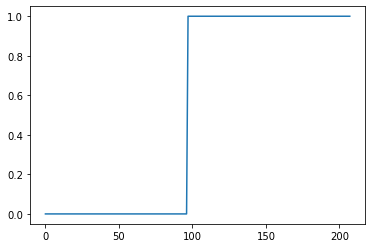

In [53]:
# visualisation de la colonne 'OBJET' (=binaire)
df["OBJET"].plot()

## Boîte à moustaches

Dans notre cas, met en avant les valeurs extrêmes. Si l'entraînement du modèle est perturbé, nous pourrons traiter ces valeurs par la suite.

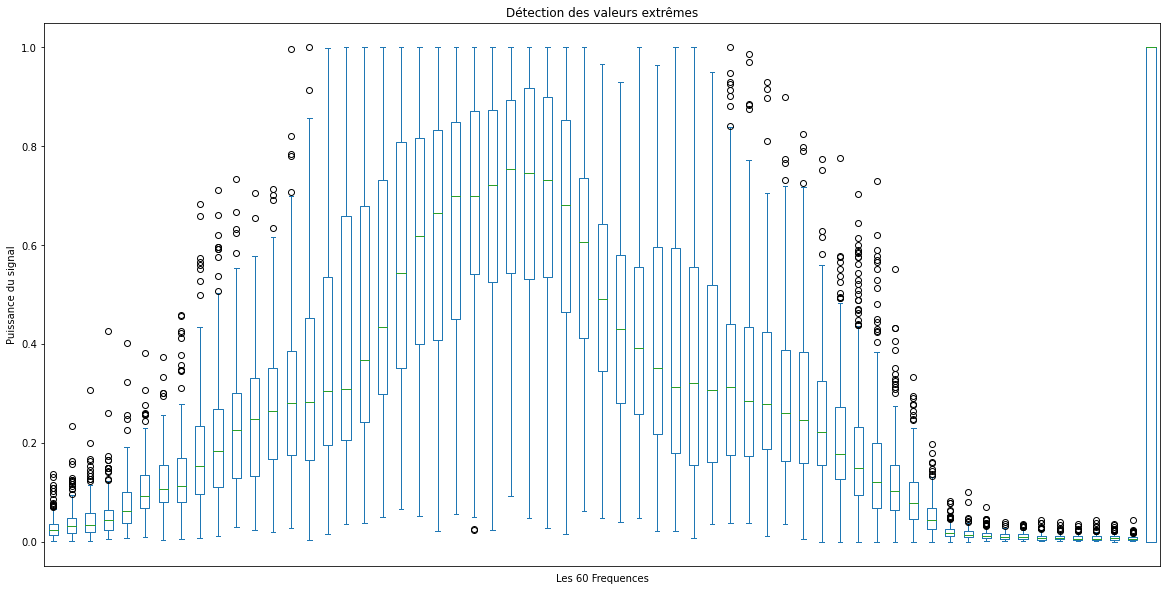

In [56]:
#XTicks [] permet de ne pas afficher les libellés des différentes fréquences : " F1 , F2 .... "
df.plot.box(figsize=(20 , 10), xticks=[] )
#Information concernant le graphique
plt.title('Détection des valeurs extrêmes')
plt.xlabel('Les 60 Frequences')
plt.ylabel('Puissance du signal')
plt.show()

## Séparation des données :  Train/Test

In [115]:
array = df.values

X = array[:, 0:-1].astype(float)
y = array[:, -1].astype(int)

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Algorithmes

In [117]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
# fonction de calcul du précision
from sklearn.metrics import accuracy_score

#Suppression des erreurs de type warning
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [118]:
# régression logistique
regression_logistique = LogisticRegression()
regression_logistique.fit(X_train, y_train)
predictions = regression_logistique.predict(X_test)
print("Logistic regression: "+str(accuracy_score(predictions, y_test)))

# arbre de décision
arbre_decision = DecisionTreeClassifier()
arbre_decision.fit(X_train, y_train)
predictions = arbre_decision.predict(X_test)
print("Decision tree:  "+str(accuracy_score(predictions, y_test)))


# forêt aléatoire
foret_aleatoire= RandomForestClassifier()
foret_aleatoire.fit(X_train, y_train)
predictions = foret_aleatoire.predict(X_test)
print("Random forest: "+str(accuracy_score(predictions, y_test)))


# K + proches voisins
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
predictions = knn.predict(X_test)
print("KNN: "+str(accuracy_score(predictions, y_test)))


# machine vecteurs de support
SVM = SVC(gamma='auto')
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
print("SVM: "+str(accuracy_score(predictions, y_test)))

Logistic regression: 0.7857142857142857
Decision tree:  0.6666666666666666
Random forest: 0.8095238095238095
KNN: 0.8571428571428571
SVM: 0.8333333333333334


## Optimisation  du SVM

L'hyperparamètre **C** pénalise les termes d'erreurs. Le SVM va chercher le meilleur compromis entre la maximisation de la marge et la minimisation des erreurs en utilisant ce paramètre afin de généraliser ses prédictions :

- si la valeur de C est importante alors la marge est réduite
- si la valeur de C est faible alors la marge est large

Utilisation de `GridSearchCV` qui va tester différents hyperparamètres pour sélectionner le plus optimal. 

In [122]:
from sklearn.model_selection import GridSearchCV

#Définition d'une plage de valeurs à tester = C ira de 1 à 100
penalite = [{'C': range(1,100)}]

#Tests avec 5 échantillon de Validation Croisée
recherche_optimisations = GridSearchCV(SVC(), penalite, cv=5)
recherche_optimisations.fit(X_train, y_train)

print("Le meilleur paramètre est :\t", recherche_optimisations.best_params_)

Le meilleur paramètre est :	 {'C': 35}


## Réentraînement du modèle avec le nouvel hyperparamètre 

In [126]:
# machine vecteurs de support
SVM = SVC(C=35, gamma='auto')
SVM.fit(X_train, y_train)
predictions = SVM.predict(X_test)
print("SVM optimisée :  ", accuracy_score(predictions, y_test))

SVM optimisée :   0.9047619047619048
